In [ ]:
import bigframes as bf
import bigframes.pandas as bpd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

client = bigquery.Client()

In [ ]:
bf.options.bigquery.project = "cdle-415809"
bf.options.bigquery.location = "us-central1"

In [ ]:
df = bpd.read_gbq("cdle-415809.CDLE.Projeto1")
df

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,89665332,10724,164826,231067,3652,2185-06-10 15:30:00,2185-06-10 16:15:00,16660,98,98,Deg F,<NA>,<NA>,<NA>,NotStopd
1,271155005,40548,168670,260223,223901,2156-08-09 08:00:00,2156-08-09 12:43:00,19463,Obeys Commands,6,<NA>,0,0,<NA>,<NA>
2,85506333,9960,159243,200036,550,2181-08-29 03:00:00,2181-08-29 04:02:00,18592,Universal,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
3,183524860,30310,121631,282905,171,2108-11-16 17:00:00,2108-11-16 19:45:00,15630,Cough/DeepBreath,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
4,74709283,7731,125193,287285,32,2178-02-28 01:00:00,2178-02-28 03:25:00,21570,Tolerated Well,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
5,161747143,25368,146404,233582,618,2128-09-17 17:00:00,2128-09-17 17:02:00,15283,24,24,BPM,<NA>,<NA>,<NA>,NotStopd
6,224304991,31044,184171,204730,5820,2121-05-04 19:00:00,2121-05-04 19:11:00,16302,90,90,%,<NA>,<NA>,<NA>,NotStopd
7,24361814,78532,177956,240761,224150,2159-05-08 03:00:00,2159-05-08 06:45:00,17574,176,176,mmHg,0,0,<NA>,<NA>
8,54287556,3868,157650,269518,211,2125-09-13 07:00:00,2125-09-13 07:30:00,17189,87,87,BPM,<NA>,<NA>,<NA>,NotStopd
9,135859715,19942,190227,213176,683,2164-07-27 12:00:00,2164-07-27 12:04:00,18795,500,500,ml/B,<NA>,<NA>,<NA>,NotStopd


## Análise Descritiva INICIAL do LOS

In [ ]:
query = """
SELECT
  AVG(LOS) AS mean_LOS,
  STDDEV(LOS) AS std_dev_LOS,
  MIN(LOS) AS min_LOS,
  MAX(LOS) AS max_LOS
FROM
  `cdle-415809.CDLE.Data`;
"""
bpd.read_gbq(query, use_cache=False)

,mean_LOS,std_dev_LOS,min_LOS,max_LOS
0,20.701953,26.34759,0.0002,173.0725


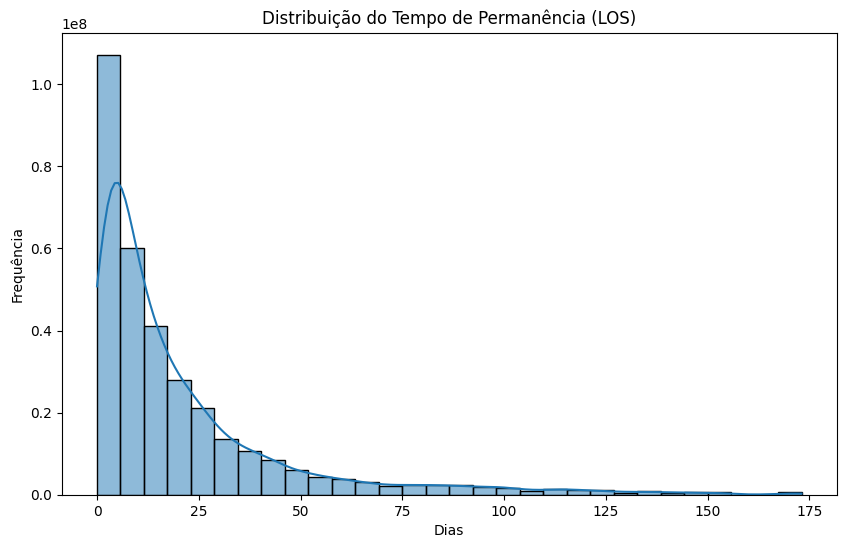

In [ ]:
query = """
SELECT
    LOS,
    COUNT(*) AS count
FROM `cdle-415809.CDLE.Data`
GROUP BY LOS
ORDER BY LOS
"""

los_distribution = client.query(query).to_dataframe()

plt.figure(figsize=(10, 6))
sns.histplot(data=los_distribution, x='LOS', weights='count', bins=30, kde=True)
plt.title('Distribuição do Tempo de Permanência (LOS)')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()

## Distribuição da Idade dos Pacientes

In [ ]:
query = """
SELECT AGES, COUNT(*) AS count
FROM (
    SELECT
        SUBJECT_ID,
        AGES,
    FROM `cdle-415809.CDLE.Data` AS Data
)
GROUP BY AGES
ORDER BY AGES
"""
age = client.query(query).to_dataframe()

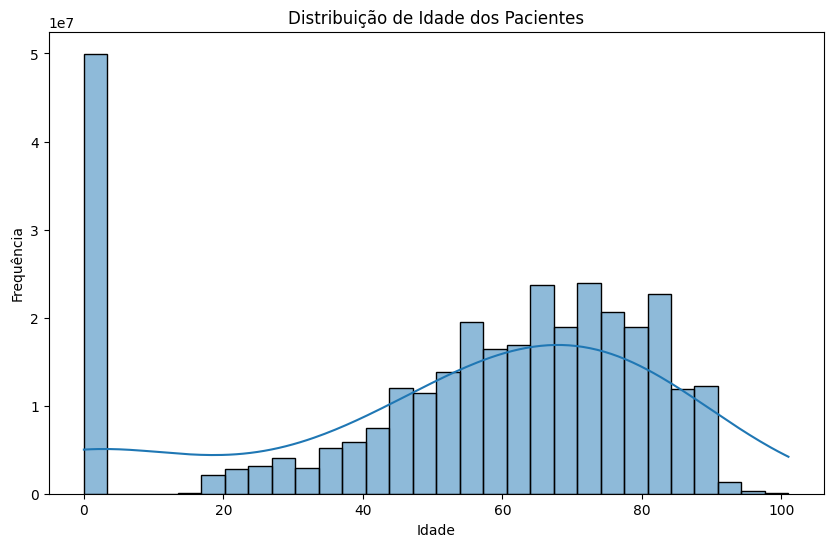

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=age, x='AGES', weights='count', bins=30, kde=True)
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## Análise de Correlação entre Variáveis

In [ ]:
query = f"""
SELECT
    AGES,
    LOS,
    CASE
        WHEN GENDER = 'M' THEN 1
        ELSE 0
    END AS GENDER
FROM `cdle-415809.CDLE.Data` AS Data
WHERE LOS IS NOT NULL
ORDER BY RAND()
LIMIT 100000
"""
bpd.read_gbq(query, use_cache=False)

,AGES,LOS,GENDER
0,0,37.3271,0
1,0,37.3271,0
2,0,37.3271,0
3,0,37.3271,0
4,0,37.3271,0
5,0,37.3271,0
6,0,37.3271,0
7,0,37.3271,0
8,44,1.4521,0
9,44,1.4521,0


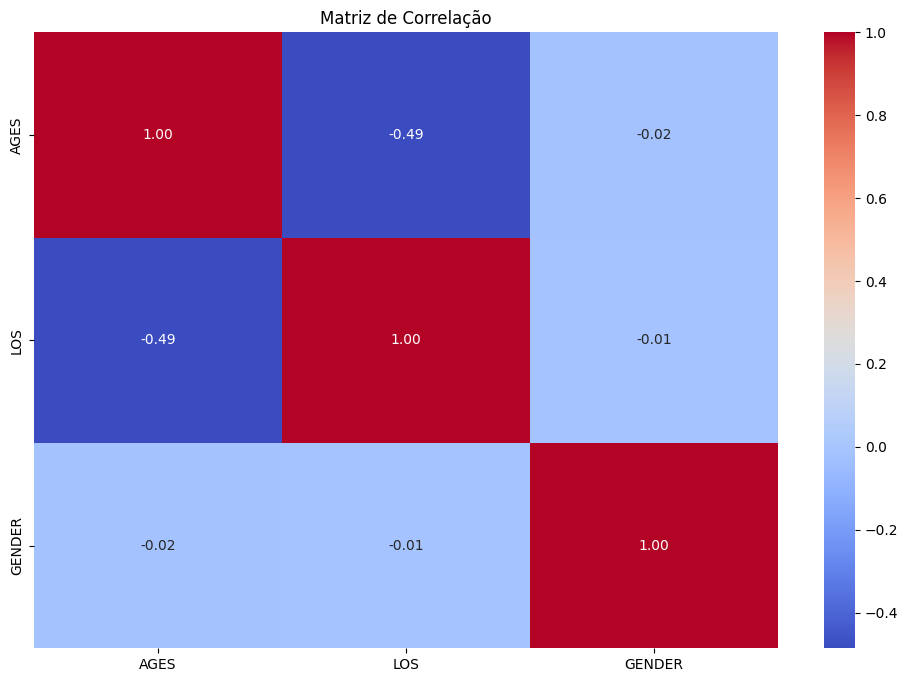

In [ ]:
correlation_data = client.query(query).to_dataframe()

plt.figure(figsize=(12, 8))
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Principais Diagnósticos

In [ ]:
query = f"""
SELECT
    DIAGNOSES_ICD.ICD9_CODE AS DIAGNOSIS,
    COUNT(*) AS count
FROM `cdle-415809.CDLE.Diagnoses` AS DIAGNOSES_ICD
GROUP BY DIAGNOSIS
ORDER BY count DESC
LIMIT 10
"""
top_diagnoses = client.query(query).to_dataframe()

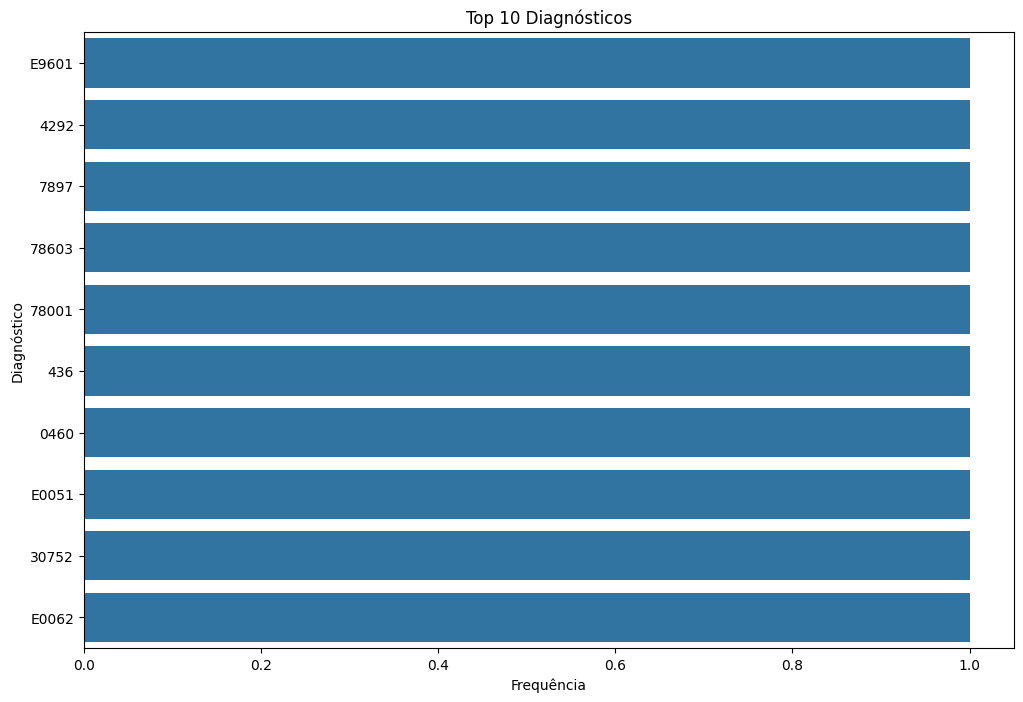

In [ ]:
top_diagnoses = client.query(query).to_dataframe()

plt.figure(figsize=(12, 8))
sns.barplot(y=top_diagnoses['DIAGNOSIS'], x=top_diagnoses['count'])
plt.title('Top 10 Diagnósticos')
plt.xlabel('Frequência')
plt.ylabel('Diagnóstico')
plt.show()

## Análise de Variáveis Categóricas


In [ ]:
query = """
SELECT
  ADMISSION_TYPE,
  AVG(LOS) AS mean_LOS
FROM
  `cdle-415809.CDLE.Data`
GROUP BY
  ADMISSION_TYPE;

"""

bpd.read_gbq(query,use_cache=False)

,ADMISSION_TYPE,mean_LOS
0,EMERGENCY,14.602449
1,ELECTIVE,14.026051
2,URGENT,19.471985
3,NEWBORN,55.946356


In [ ]:
query = """
SELECT
  PROCEDURES,
  AVG(LOS) AS mean_LOS
FROM
  `cdle-415809.CDLE.Model`
GROUP BY
  PROCEDURES;

"""

bpd.read_gbq(query,use_cache=False)

,PROCEDURES,mean_LOS
0,"212,131,9910",4.8827
1,"45,3722,66,8856,40,3607",1.8725
2,"9672,8659,9904,118,3404,966,3891",4.9805
3,"221,139,8841,9671,234,9604,125,3897",4.1887
4,"4519,4513,9920",2.951
5,"966,9604,9955",12.5381
6,"3893,3995,3895,3891,5551",2.0839
7,"9955,3893,9983,9671,640,9604,966,9915,9390",51.9711
8,"3723,9915,3522,8853,8856,3323,3321,9605,3961,9...",15.0959
9,"3323,3324,3979,9656,3201,8862,3897,9672,8842,5...",11.8841


In [ ]:
query = """
SELECT
  ITEMID,
  AVG(LOS) AS mean_LOS
FROM
  `cdle-415809.CDLE.Data`
GROUP BY
  ITEMID;

"""

bpd.read_gbq(query,use_cache=False)

,ITEMID,mean_LOS
0,225309,12.120106
1,7663,4.6237
2,6484,1.5698
3,847,43.23444
4,225016,22.902967
5,1689,26.391763
6,220274,10.425755
7,7649,33.8757
8,763,13.671678
9,1404,19.246767


In [ ]:
query = """
SELECT
  DIAGNOSES,
  AVG(LOS) AS mean_LOS
FROM
  `cdle-415809.CDLE.Model`
GROUP BY
  DIAGNOSES;

"""

bpd.read_gbq(query,use_cache=False)

,DIAGNOSES,mean_LOS
0,"5845,78551,570,99592,412,78552,4280,2762,V5861...",7.4455
1,"53081,4254,5839,29570,V550,5856,28521,V561,996...",1.173
2,"28860,486,30000,53140,57410,99739,2800,23871",1.18
3,"99672,E8798,4254,4589,4280,42090",2.8246
4,"5849,51881,42832,5853,496,4280,78820,591,2760,...",8.1542
5,"3484,40390,78039,1918,5854,5219,0417,43820,576...",6.578
6,"5533,99591,4280,2851,2839,42832,2753,4168,5859...",4.8455
7,"4589,4580,2762,5849,2858,29181,3051,311,2769,E...",0.9425
8,"V4364,4241,4280,4019,5185,29181,9341,2867,5712...",27.0464
9,"V4581,53240,49320,412,4019",1.0201


## Tendencia Temporal

In [ ]:
query = """
SELECT
    SUBJECT_ID,
    CHARTTIME,
    VALUE
FROM `cdle-415809.CDLE.Projeto1`
WHERE CAST(ITEMID AS INT64) = 220045  -- Exemplo: ItemID para Heart Rate (BPM)
AND VALUE IS NOT NULL
LIMIT 1000
"""

clinical_data = client.query(query).to_dataframe()

<ipython-input-29-0e9dc5924b3e>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='TIME', y='VALUE', data=clinical_data, ci='sd')


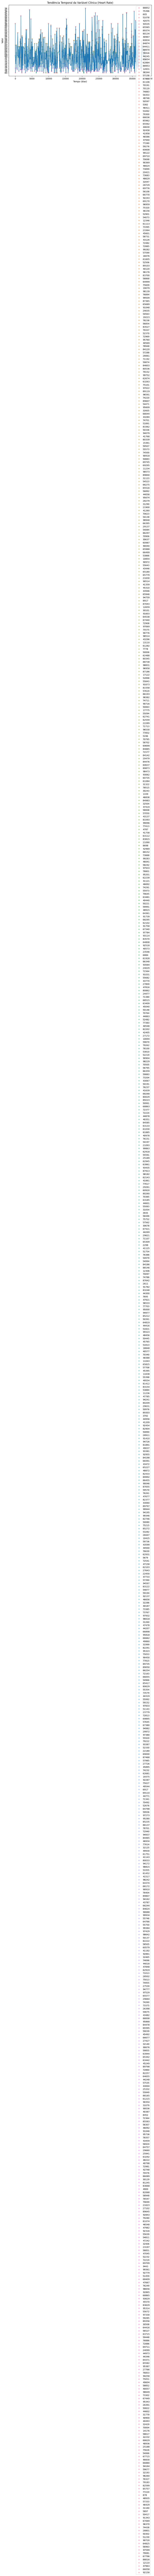

In [ ]:
clinical_data['CHARTTIME'] = bpd.to_datetime(clinical_data['CHARTTIME'], utc=True)
clinical_data['TIME'] = (clinical_data['CHARTTIME'] - clinical_data['CHARTTIME'].min()).dt.total_seconds() / (24 * 3600)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TIME', y='VALUE', hue='SUBJECT_ID', data=clinical_data, alpha=0.5)
sns.lineplot(x='TIME', y='VALUE', data=clinical_data, ci='sd')
plt.title('Tendência Temporal da Variável Clínica (Heart Rate)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valor')
#plt.legend(title='ID do Paciente')
plt.show()

## Tempo de Permanência por Grupo Etário

In [ ]:
query = """
SELECT
    GREATEST(0, CAST(AGES AS INT64 )) AS AGES,
    LOS
FROM `cdle-415809.CDLE.Data`
WHERE LOS IS NOT NULL
ORDER BY RAND()
LIMIT 10000
"""

age_los = client.query(query).to_dataframe()

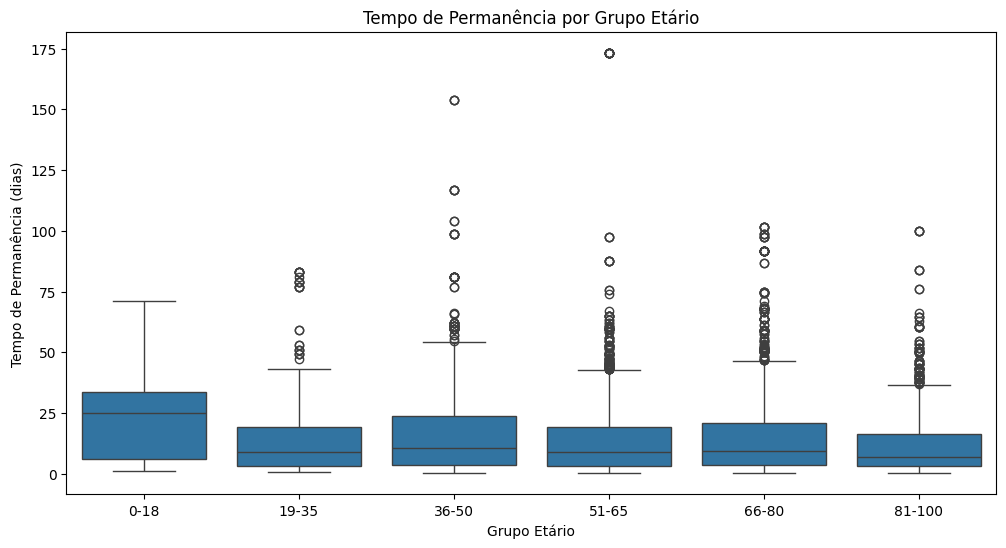

In [ ]:
import pandas as pd
age_los['AGE_GROUP'] = pd.cut(age_los['AGES'], bins=[0, 18, 35, 50, 65, 80, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81-100'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='LOS', data=age_los)
plt.title('Tempo de Permanência por Grupo Etário')
plt.xlabel('Grupo Etário')
plt.ylabel('Tempo de Permanência (dias)')
plt.show()

## Dispersão de Idade vs Tempo de Permanência

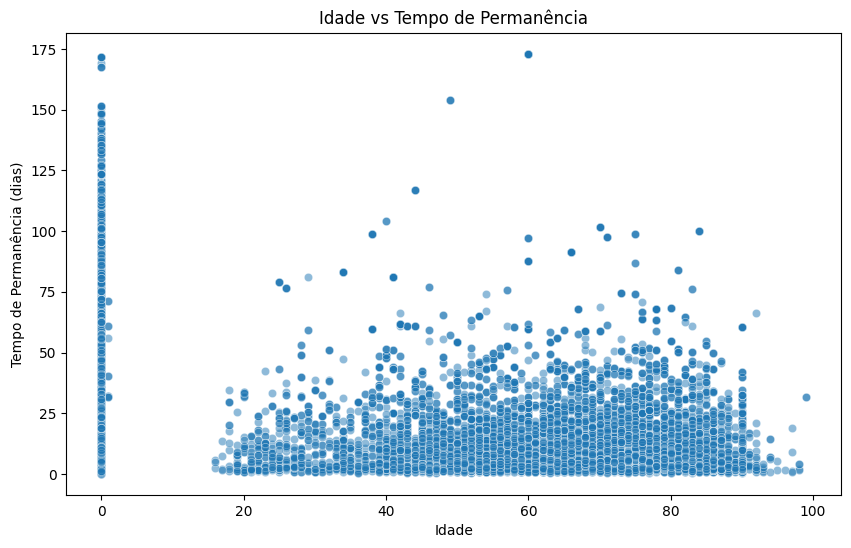

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGES', y='LOS', data=age_los, alpha=0.5)
plt.title('Idade vs Tempo de Permanência')
plt.xlabel('Idade')
plt.ylabel('Tempo de Permanência (dias)')
plt.show()